In [1]:
#imorting modules
import keras
from keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPooling2D,TimeDistributed,LSTM
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np 
import os
import pandas as pd 
import tensorflow as tf
from glob import glob
import IPython
import matplotlib.pyplot as plt
from IPython.display import Audio


Using TensorFlow backend.


In [9]:
#loading into memory 
zero=glob("../input/train/audio/zero" + '/*.wav')
one=glob("../input/train/audio/one" + '/*.wav')
two=glob("../input/train/audio/two" + '/*.wav')
three=glob("../input/train/audio/three" + '/*.wav')
four=glob("../input/train/audio/four" + '/*.wav')
five=glob("../input/train/audio/five" + '/*.wav')
six=glob("../input/train/audio/six" + '/*.wav')
seven=glob("../input/train/audio/seven" + '/*.wav')
eight=glob("../input/train/audio/eight" + '/*.wav')
nine=glob("../input/train/audio/nine" + '/*.wav')


In [10]:
#labelling`
one1=[]

for i in range(0,len(zero)):
    one1.append((zero[i],0))
for i in range(0,len(one)):
    one1.append((one[i],1))
for i in range(0,len(two)):
    one1.append((two[i],2))
for i in range(0,len(three)):
    one1.append((three[i],3))
for i in range(0,len(four)):
    one1.append((four[i],4))
for i in range(0,len(five)):
    one1.append((five[i],5))
for i in range(0,len(six)):
    one1.append((six[i],6))
for i in range(0,len(seven)):
    one1.append((seven[i],7))
for i in range(0,len(eight)):
    one1.append((eight[i],8))
for i in range(0,len(nine)):
    one1.append((nine[i],9))


In [11]:
#PREPROCESSING
D1=[]
dataframe=pd.DataFrame(one1,columns=["a","b"])
for row in range(0,len(dataframe)):
        y,sr = librosa.load(dataframe["a"][row],duration=1)
        ps = librosa.feature.melspectrogram(y=y,sr=sr)
        ps=librosa.util.fix_length(ps,44)
        D1.append((ps,dataframe["b"][row]))
len(D1)        

23666

In [12]:
#MODELING THE DATA
df2=pd.DataFrame(D1,columns=["ab","bc"])
df2=df2.sample(frac=1)
train=df2[:19000]
test=df2[19000:23000]
valid=df2[23000:23666]
train_x=train["ab"].values
test_x=test["ab"].values
valid_x=valid["ab"].values
train_x = np.array([x.reshape( (128, 44, 1) ) for x in train_x])
train_y=train["bc"].values
test_x = np.array([x.reshape( (128, 44, 1) ) for x in test_x])
test_y=test["bc"].values
valid_x = np.array([x.reshape( (128, 44, 1) ) for x in valid_x])
valid_y=valid["bc"].values

In [13]:
#MODEL
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=[128,44,1],activation="relu"),
    tf.keras.layers.MaxPooling2D(1,1),
     tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

In [14]:
#compiling and fitting
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

history=model.fit(
    x=train_x, 
    y=train_y,
    epochs=20,
    batch_size=128,validation_data=(valid_x,valid_y))
score = model.evaluate(
    x=test_x,
    y=test_y)

print('Test loss:', score[0])
print('Test accuray:', score[1])
model.save('D:\\my_modelsounds.h5')

Train on 19000 samples, validate on 666 samples
Epoch 1/16
19000/19000 [==============================] - 8s 410us/sample - loss: 1.9964 - acc: 0.3611 - val_loss: 1.4384 - val_acc: 0.5150
Epoch 2/16
19000/19000 [==============================] - 4s 233us/sample - loss: 1.1529 - acc: 0.6310 - val_loss: 0.9213 - val_acc: 0.6862
Epoch 3/16
19000/19000 [==============================] - 4s 231us/sample - loss: 0.8465 - acc: 0.7283 - val_loss: 0.8827 - val_acc: 0.7297
Epoch 4/16
19000/19000 [==============================] - 4s 231us/sample - loss: 0.6579 - acc: 0.7860 - val_loss: 0.6433 - val_acc: 0.7973
Epoch 5/16
19000/19000 [==============================] - 4s 232us/sample - loss: 0.5202 - acc: 0.8302 - val_loss: 0.6524 - val_acc: 0.7988
Epoch 6/16
19000/19000 [==============================] - 4s 232us/sample - loss: 0.4678 - acc: 0.8493 - val_loss: 0.5867 - val_acc: 0.8333
Epoch 7/16
19000/19000 [==============================] - 4s 232us/sample - loss: 0.3910 - acc: 0.8751 - val_los

In [24]:
#intitution for number 4
sample='/kaggle/input/train/audio/zero/baeac2ba_nohash_0.wav'
y,sr = librosa.load(sample,duration=1)
ps = librosa.feature.melspectrogram(y=y,sr=sr)
ps=librosa.util.fix_length(ps,44)
ps=np.reshape(ps,(1,128,44,1))
Audio(y,filename=sample)



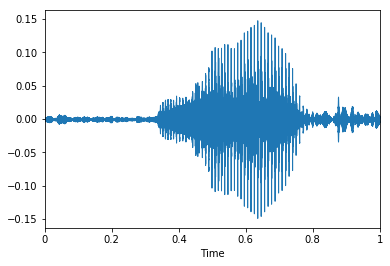

In [25]:
#waveplot
librosa.display.waveplot(y, sr=sr)

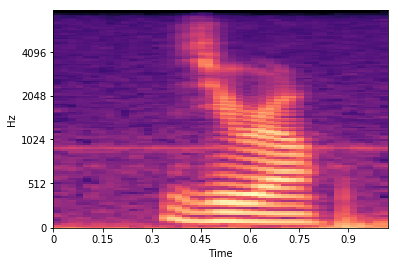

In [26]:
#filter
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,
                         x_axis='time')

In [27]:
#probabilities
l=model.predict(ps)
print(l)

[[9.9999571e-01 1.7626196e-10 4.1164208e-06 1.8064680e-10 6.2544615e-08
  5.3721372e-12 4.1282416e-12 6.9535544e-10 1.5896349e-15 3.3135187e-08]]


In [28]:
#class label
predict = np.array(l)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[0]